## **Import Needed Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

## **Read Data**

In [2]:
df=pd.read_csv('/kaggle/input/polynomial-linear-regression-dataset/rank_salary.csv')
df

,Position,Level,Salary
0,Teaching Assistants,1,45000
1,Guest Faculty,2,50000
2,Contractual Faculty,3,60000
3,Assistant Professor,4,80000
4,Associate Professor,5,110000
5,Professor,6,150000
6,Associate Dean,7,200000
7,Dean,8,300000
8,Vice Chancellor,9,500000
9,Chancellor,10,1000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [4]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [5]:
df.drop(columns=['Position'],inplace=True)

## **Visulize**

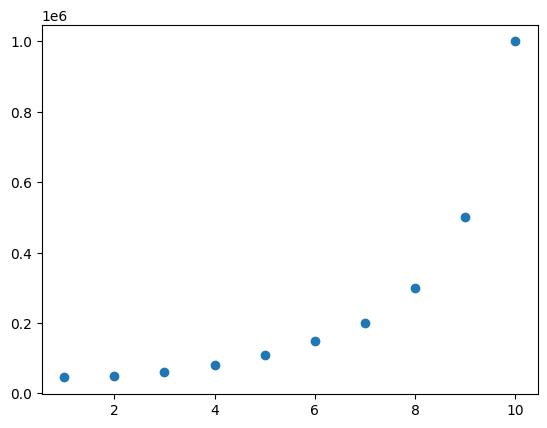

In [6]:
plt.scatter(df['Level'],df['Salary'])

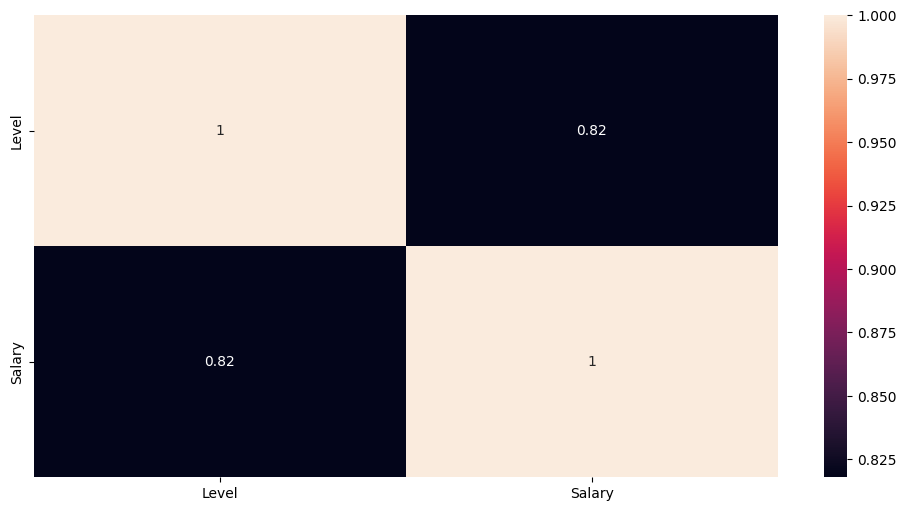

In [7]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

## define feature and Target

### split data

In [8]:
x=df[['Level']]
y=df[['Salary']]

## **Bulid Model**

In [9]:
LR=LinearRegression()
LR.fit(x,y)

LinearRegression()

In [10]:
LR.coef_

array([[80878.78787879]])

In [11]:
LR.intercept_

array([-195333.33333333])

In [12]:
y_pre=LR.predict(x)

In [13]:
print(r2_score(y,y_pre))

0.6690412331929895


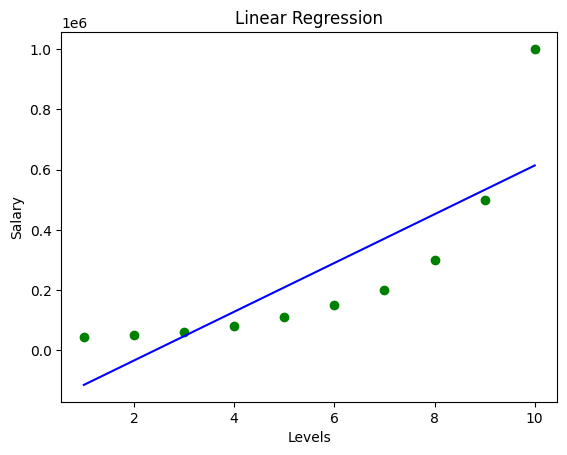

In [14]:
plt.scatter(x,y,color='g')
plt.plot(x,y_pre,color='b')
plt.title("Linear Regression")
plt.xlabel("Levels")
plt.ylabel("Salary")
plt.show()

## **polynomial Regression**

In [15]:
PR=PolynomialFeatures(degree=3)
x_poly=PR.fit_transform(x)
LR.fit(x_poly,y)

LinearRegression()

In [16]:
y_pred=LR.predict(x_poly)

In [17]:
print(r2_score(y,y_pred))

0.9812097727913366


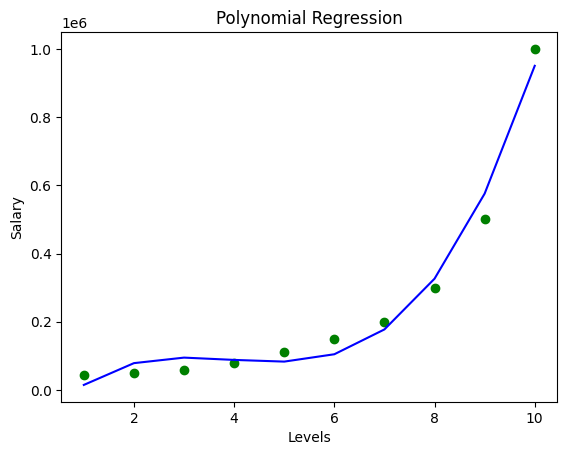

In [18]:
plt.scatter(x,y,color='g')
plt.plot(x,y_pred,color='b')
plt.title("Polynomial Regression")
plt.xlabel("Levels")
plt.ylabel("Salary")
plt.show()